In [1]:
import csv
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer

#for model
complete_list = []

#for training
sentences = []
labels = []

#for testing
test_sentences = []
test_labels = []

# 87 is the maximum number of words in a sentence and all shorter sentences are padded to this size

with open('newstrainorig.csv') as f:
    rows = csv.reader(f)
    for row in rows:
        rowlist = RegexpTokenizer(r'\w+').tokenize(row[1].lower())
        while len(rowlist) < 87:
            rowlist.append('unk')
        complete_list.append(rowlist)
        sentences.append(rowlist)
        labels.append(row[0])

with open('newstestorig.csv') as f:
    rows = csv.reader(f)
    for row in rows:
        rowlist = RegexpTokenizer(r'\w+').tokenize(row[1].lower())
        while len(rowlist) < 87:
            rowlist.append('unk')
        complete_list.append(rowlist)
        test_sentences.append(rowlist)
        test_labels.append(row[0])

# Word2Vec model
model = Word2Vec(complete_list, size=200, min_count=1, sg=1)
print(model)
# save model
model.save('model_news.bin')

# load model
model_news = Word2Vec.load('model_news.bin')

train_dataset = []
for i in range(20000):
    train_dataset.append(model_news[sentences[i]])

test_dataset = []
for i in range(4000):
    test_dataset.append(model_news[test_sentences[i]])

C:\Users\apurv\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Word2Vec(vocab=34884, size=200, alpha=0.025)


C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


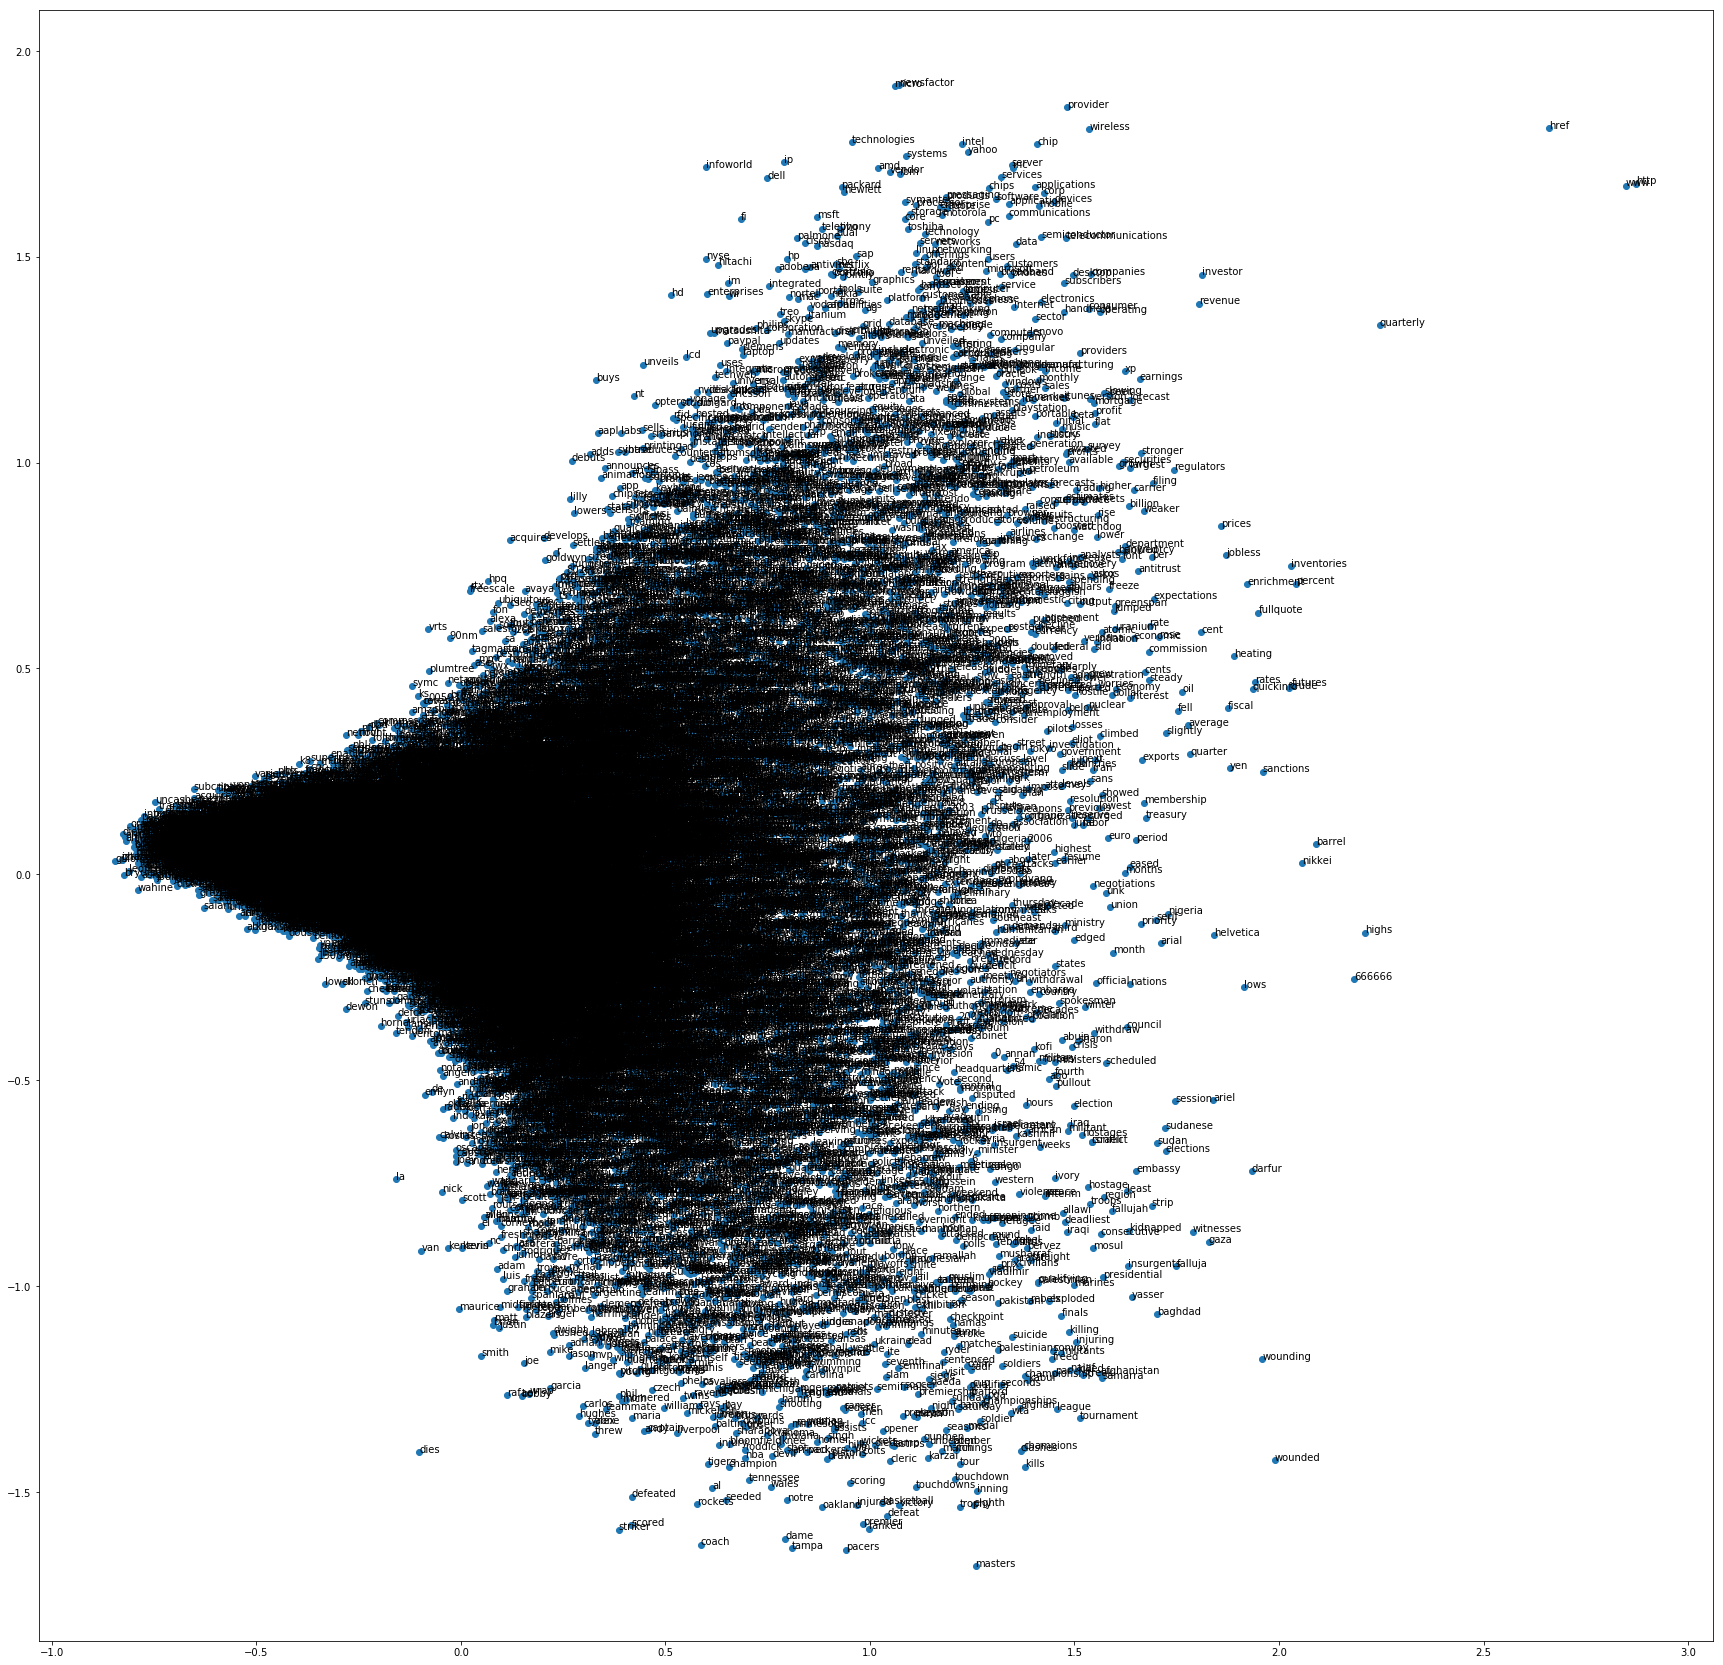

In [3]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.figure(figsize=(30,30))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# Text Classification CNN Model (tensorflow)

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 87, 200, 1])
    
    '''
    # Convolutional Layer #1 filter 0
    conv_f0 = tf.layers.conv2d(
        inputs=input_layer,
        filters=3,
        kernel_size=[6, 200],
        activation=tf.nn.relu)
    '''
    
    # Convolutional Layer #1 filter 1
    conv_f1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=3,
        kernel_size=[5, 200],
        activation=tf.nn.relu)
    
    #print(conv_f1.get_shape())

    # Convolutional Layer #1 filter 2
    conv_f2 = tf.layers.conv2d(
        inputs=input_layer,
        filters=3,
        kernel_size=[4, 200],
        activation=tf.nn.relu)

    # Convolutional Layer #1 filter 3
    conv_f3 = tf.layers.conv2d(
        inputs=input_layer,
        filters=3,
        kernel_size=[3, 200],
        activation=tf.nn.relu)
    
    # Convolutional Layer #1 filter 4
    conv_f4 = tf.layers.conv2d(
        inputs=input_layer,
        filters=3,
        kernel_size=[2, 200],
        activation=tf.nn.relu)

    # Pooling Layer #1 section 0
    #pool1_m0 = tf.layers.max_pooling2d(inputs=conv_f0, pool_size=[82, 1], strides=82)

    # Pooling Layer #1 section 1
    pool1_m1 = tf.layers.max_pooling2d(inputs=conv_f1, pool_size=[83, 1], strides=83)
    #pool1_a1 = tf.layers.average_pooling2d(inputs=conv_f2, pool_size=[84, 1], strides=84)

    #print(pool1_m1.get_shape())

    # Pooling Layer #1 section 2
    pool1_m2 = tf.layers.max_pooling2d(inputs=conv_f2, pool_size=[84, 1], strides=84)
    #pool1_a2 = tf.layers.average_pooling2d(inputs=conv_f3, pool_size=[85, 1], strides=85)

    # Pooling Layer #1 section 3
    pool1_m3 = tf.layers.max_pooling2d(inputs=conv_f3, pool_size=[85, 1], strides=85)
    #pool1_a3 = tf.layers.average_pooling2d(inputs=conv_f4, pool_size=[86, 1], strides=86)
    
    # Pooling Layer #1 section 3
    pool1_m4 = tf.layers.max_pooling2d(inputs=conv_f4, pool_size=[86, 1], strides=86)

    
    #pool1 = tf.concat([pool1_a1, pool1_a2, pool1_a3], 1)
    pool1 = tf.concat([pool1_m1, pool1_m2, pool1_m3, pool1_m4], 1)
    #pool1 = tf.concat([pool1_m0, pool1_m1, pool1_m2, pool1_m3, pool1_m4], 1)
    
    print(pool1.get_shape)
    
    # Dense Layer
    pool2_flat = tf.reshape(pool1, [-1, 4*1*3])
    dense = tf.layers.dense(inputs=pool2_flat, units=36, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.3, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=4)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

def cnn_text():
    # Load training and eval data
    train_data = np.array(train_dataset)
    train_labels = np.asarray(labels, dtype=np.int32)
    eval_data = np.array(test_dataset)
    eval_labels = np.asarray(test_labels, dtype=np.int32)
    # Create the Estimator
    text_classifier = tf.estimator.Estimator(
        model_fn=cnn_model_fn, model_dir="agnewscase")
    #Set up logging for predictions
    tensors_to_log = {"probabilities": "softmax_tensor"}
    logging_hook = tf.train.LoggingTensorHook(
        tensors=tensors_to_log, every_n_iter=40)
    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": train_data},
        y=train_labels,
        batch_size=500,
        num_epochs=None,
        shuffle=True)
    text_classifier.train(
        input_fn=train_input_fn,
        steps=40,
        hooks=[logging_hook])
    # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": eval_data},
        y=eval_labels,
        num_epochs=1,
        shuffle=False)
    eval_results = text_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)

In [ ]:
# Call to cnn_text method
# Run once for one epoch
cnn_text()